# Processamento de linguagem natural para predição de avaliações de compras em E-Commerce

O objetivo desse trabalho de mineração sera poder criar um modelo de classificaçao capaz de predizer a avaliação que o produto teria se tivesse sido preenchido, atraves do aprendizado de maquina, utilizando como base de dados para o treino do modelo os dados referentesa avaliação que estao devidamente preenchidos.

O dataset consiste em um conjunto de dados públicos de e-commerce brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em diversos mercados no Brasil. Seus recursos permitem a visualização de um pedido em múltiplas dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também há um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros às coordenadas de latitude e longitude.

Estes são dados comerciais reais, foram anonimizados e as referências às empresas e parceiros no texto da avaliação foram substituídas pelos nomes das grandes casas de Game of Thrones.

##### Estrutura dos dados
<img src="./data/HRhd2Y0.png">

### Imports

In [1]:
import pandas as pd

### Carregando Dados

In [2]:
reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


### Análise Exploratória

##### Valores nulos

In [3]:
reviews_df[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)

review_score                  0
review_comment_title      88285
review_comment_message    58247
dtype: int64

Basicamente, metade das avaliações estão sem comentário, e a grande maioria não possui titulo

##### Há relação entre comentarios vazios e avaliações boas/ruins? 

In [6]:
ruins = reviews_df[reviews_df['review_score'].isin([0,1,2])]
boas = reviews_df[reviews_df['review_score'].isin([4,5])]

Ruins

In [7]:
#Não preenchidos
ruins[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)

review_score                  0
review_comment_title      12642
review_comment_message     3685
dtype: int64

In [8]:
#Preenchidos
ruins[['review_score', 'review_comment_title', 'review_comment_message']].count()

review_score              15093
review_comment_title       2451
review_comment_message    11408
dtype: int64

In [9]:
#Proporção
ruins_nan_count = ruins[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)
ruins_notnan_count = ruins[['review_score', 'review_comment_title', 'review_comment_message']].count()

total_comment_message_ruins = ruins_nan_count['review_comment_message'] + ruins_notnan_count['review_comment_message']
print('{:.2f}% dos comentarios de avaliações ruins são preenchidos'.format((ruins_notnan_count['review_comment_message']*100)/total_comment_message_ruins))

75.58% dos comentarios de avaliações ruins são preenchidos


Boas

In [11]:
#Não Preenchidas
boas[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)

review_score                  0
review_comment_title      68199
review_comment_message    49940
dtype: int64

In [12]:
#Preenchidos
boas[['review_score', 'review_comment_title', 'review_comment_message']].count()

review_score              76620
review_comment_title       8421
review_comment_message    26680
dtype: int64

In [13]:
#Proporção
boas_nan_count = boas[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)
boas_notnan_count = boas[['review_score', 'review_comment_title', 'review_comment_message']].count()

total_comment_message_boas = boas_nan_count['review_comment_message'] + boas_notnan_count['review_comment_message']
print('{:.2f}% dos comentários de avaliações boas são preenchidos'.format((boas_notnan_count['review_comment_message']*100)/total_comment_message_boas))

34.82% dos comentários de avaliações boas são preenchidos


Percebemos então que avaliações positivas possuem uma maior tendência de não possuírem comentários, enquanto as ruins possuem tendência de possuírem comentários. 

Visualizando isso graficamente

In [14]:
reviews_df.sort_values(by='review_score', inplace=True)
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49
63169,f5c7bb41a0546fa40b1b451b8b49624d,1620c790cd0d6a55f4f5c3922764c96a,1,NaN,minha encomenda não chegou já procurei no corr...,2018-03-29 00:00:00,2018-03-29 12:01:14
32775,2f69718440672265f0d40604c33d06bb,43b2cd469a6cee268b9be121cbaf17ba,1,Entrega errada,Comprei dois kits de costura recebi um e a not...,2018-08-22 00:00:00,2018-08-23 10:53:04
18574,0564044dc84a8d26fdfedde8e041f98a,991dd93b0190239b4f3d41151e31d3ba,1,NaN,NaN,2018-08-21 00:00:00,2018-08-24 00:06:48
63149,562640a8507c69bb5f99d26c440e0f4a,570a2d92be76532681e5a09ac38c8e78,1,NaN,NaN,2017-12-16 00:00:00,2017-12-17 21:00:11
...,...,...,...,...,...,...,...
59590,d783a9fcdfa4e8f4b8e8bbe29cb73d3c,01fa35042136b75da24ce2a391b30eb9,5,NaN,NaN,2018-01-13 00:00:00,2018-01-16 01:03:14
32613,4d1afcf66f74b84ec2d803b745ba0d02,c8e348190c50484d7541f831a9fd75b2,5,NaN,Ótimo produto,2017-10-12 00:00:00,2017-10-13 14:31:42
59592,5533516a1e784428f8db32a1914a8619,54623479e83b4d90c3a3087c34a95187,5,Exelente!,"Bolsa simples, mas útil e boa!\r\n",2018-08-30 00:00:00,2018-08-31 02:09:03
59580,e77a17ca0a7eca0962ff8dd8b80d3472,a4388d21a40d3fa0915cd15e2172eb45,5,Recomendo,"Muito satisfeita, produto chegou antes do praz...",2018-08-22 00:00:00,2018-08-22 20:16:30


In [15]:
#Adiciona coluna Tem Comentáro 
reviews_df['tem_comentario'] = ~reviews_df[['review_comment_message']].isnull() 
reviews_com_comentario = reviews_df[reviews_df['tem_comentario'] == True]
reviews_sem_comentario = reviews_df[reviews_df['tem_comentario'] == False]

<AxesSubplot:title={'center':'Reviews com comentários'}, ylabel='Frequency'>

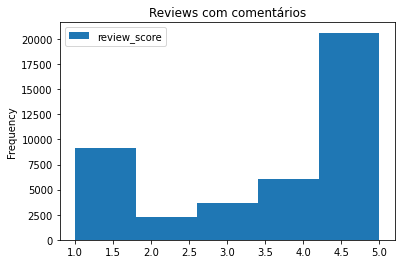

In [16]:
reviews_com_comentario['review_score'].plot.hist(legend=True, bins=5, title="Reviews com comentários")

<AxesSubplot:title={'center':'Reviews sem comentários'}, ylabel='Frequency'>

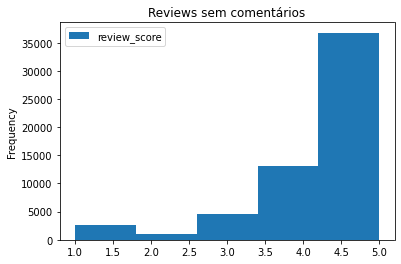

In [17]:
reviews_sem_comentario['review_score'].plot.hist(legend=True, bins=5, title="Reviews sem comentários")

### Analisando correlação com os dados das outras tabelas

##### Correlação entre reviews e timestamp das fases de compra/entrega

Análise de correlação das reviews com dados referentes ao estado do pedido e o timestamp de cada fase da compra/entrega

In [18]:
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Existe correlação entre a qualidade da review e o intervalo entre o momento em que a compra foi realizada e o momento em que a compra foi entregue? E entre o dia previsto de entrega e o dia em que realmente foi entregue? Vamos verificar

In [19]:
#Convertemos os dados referentes a data para o tipo timestamp, para que possamos medir o tempo entre elas
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [20]:
#Obtemos entao o tempo corrido entre o pedido e a entrega, e a diferença de tempo entre o tempo esperado e o tempo real
orders_df['delivery_real_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df['delivery_estimated_minus_real_time'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_real_time,delivery_estimated_minus_real_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,9 days 05:42:58


In [21]:
#Média de diferença entre o dia em que foi entregue e o dia esperado da entrega
orders_df['delivery_estimated_minus_real_time'].mean()

Timedelta('11 days 04:17:55.957616401')

In [22]:
#Agora, a correlação entre essas duas colunas e o score de review
import numpy as np

all_df = reviews_df.join(orders_df.set_index('order_id'), on='order_id')
all_df['delivery_real_time_miliseconds'] = all_df['delivery_real_time'].dt.days
all_df['delivery_estimated_minus_real_time_miliseconds'] = all_df['delivery_estimated_minus_real_time'].dt.days

In [23]:
all_df[['review_score', 'delivery_real_time_miliseconds']].corr()

,review_score,delivery_real_time_miliseconds
review_score,1.000000,-0.334696
delivery_real_time_miliseconds,-0.334696,1.000000


In [24]:
all_df[['review_score', 'delivery_estimated_minus_real_time_miliseconds']].corr()

,review_score,delivery_estimated_minus_real_time_miliseconds
review_score,1.000000,0.268881
delivery_estimated_minus_real_time_miliseconds,0.268881,1.000000


Obtemos então uma baixa correlação.

##### Correlação entre ano/mês e review_score

<AxesSubplot:title={'center':'Média de Review_score Mensal'}, xlabel='order_approved_at'>

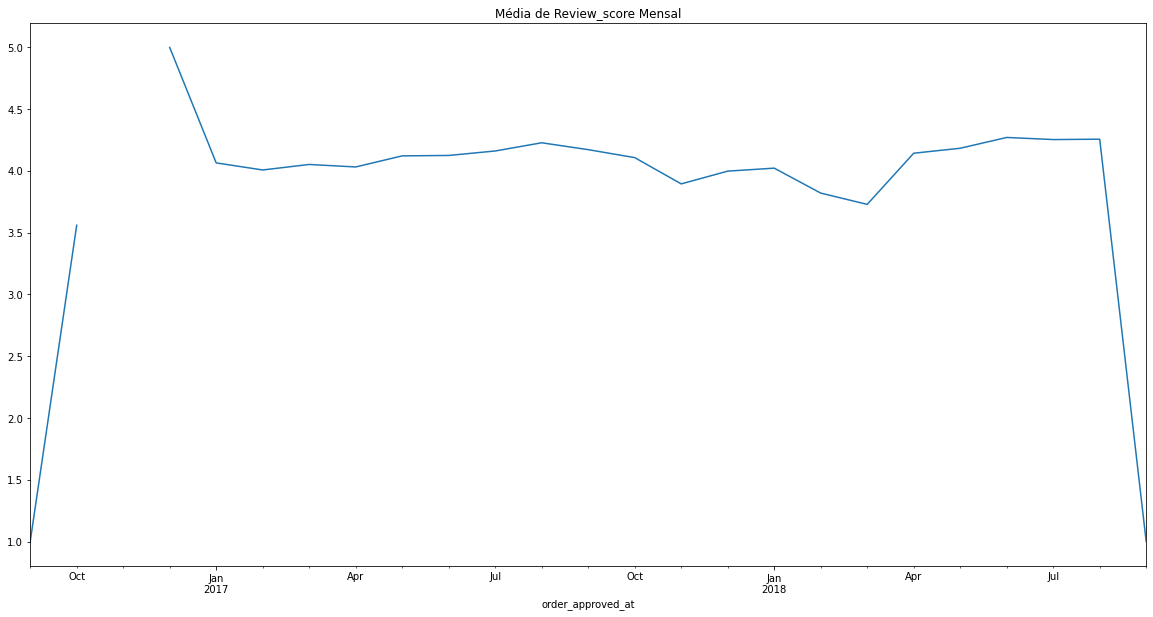

In [99]:
reviews_and_orders = reviews_df.join(orders_df.set_index('order_id'), on='order_id')
month_mean = reviews_and_orders.groupby(pd.Grouper(key="order_approved_at", freq="M")).mean()
month_mean['review_score'].plot(title="Média de Review_score Mensal", figsize=(20,10))

<AxesSubplot:title={'center':'Média de Review_score Anual'}, xlabel='order_approved_at'>

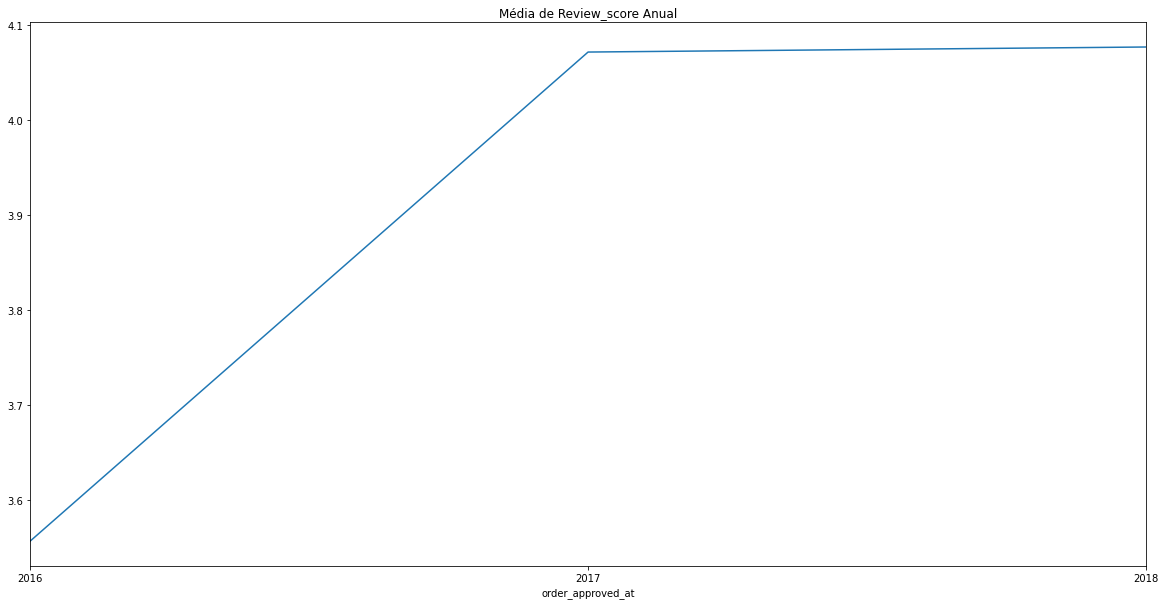

In [100]:
month_mean = reviews_and_orders.groupby(pd.Grouper(key="order_approved_at", freq="Y")).mean()
month_mean['review_score'].plot(title="Média de Review_score Anual", figsize=(20,10))

<AxesSubplot:title={'center':'Média de Review_score Diária'}, xlabel='order_approved_at'>

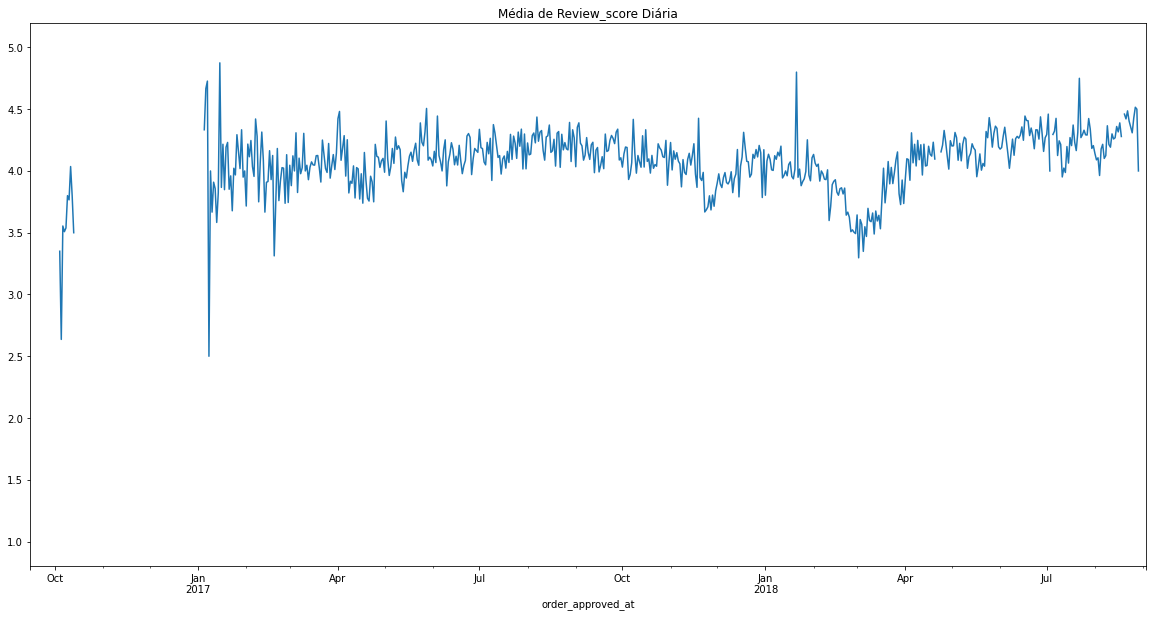

In [101]:
month_mean = reviews_and_orders.groupby(pd.Grouper(key="order_approved_at", freq="D")).mean()
month_mean['review_score'].plot(title="Média de Review_score Diária", figsize=(20,10))

_______________________________________________________________________________________________________________________________

##### Correlação entre review_score e geolocalização

Análise de correlação das reviews com dados referentes a localização aos clientes. Existe correlação entre o lugar e a qualidade da review ?
Vamos criar um mapa de calor que aponte a correlação entre a moradia dos compradores e o score das reviews

In [25]:
#Carregando dados de localização
clientes_df = pd.read_csv('./data/olist_customers_dataset.csv')
geoloc_df = pd.read_csv('./data/olist_geolocation_dataset.csv')
clientes_df.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geoloc_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geoloc_df = geoloc_df.join(clientes_df.set_index('zip_code_prefix'), on='zip_code_prefix')
geoloc_df.drop(columns=['customer_unique_id', 'customer_city', 'customer_state'], inplace=True)
geoloc_df.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id
0,1037,-23.545621,-46.639292,sao paulo,SP,05b005e82f3f2dcc41b5504f00484e50
0,1037,-23.545621,-46.639292,sao paulo,SP,19ee522d0dd140702062bb89e4820e19
0,1037,-23.545621,-46.639292,sao paulo,SP,6519f59a7687a4661f7c8a7e24f28f94
1,1046,-23.546081,-46.644820,sao paulo,SP,9a02295e3381803554347ab4dc1ab41b
1,1046,-23.546081,-46.644820,sao paulo,SP,51795c9dc161dc05ef36dc8460dfa7e7


In [26]:
#Vinculando aos dados que ja temos das compras
all_df = all_df.join(geoloc_df.set_index('customer_id'), on='customer_id')
all_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tem_comentario,customer_id,order_status,...,order_estimated_delivery_date,delivery_real_time,delivery_estimated_minus_real_time,delivery_real_time_miliseconds,delivery_estimated_minus_real_time_miliseconds,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,True,f6fff47846276bed044b63474bd38884,delivered,...,2017-07-12,2 days 23:01:29,9 days 14:15:06,2.0,9.0,7085.0,-23.420857,-46.550244,guarulhos,SP
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,True,f6fff47846276bed044b63474bd38884,delivered,...,2017-07-12,2 days 23:01:29,9 days 14:15:06,2.0,9.0,7085.0,-23.427335,-46.557347,guarulhos,SP
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,True,f6fff47846276bed044b63474bd38884,delivered,...,2017-07-12,2 days 23:01:29,9 days 14:15:06,2.0,9.0,7085.0,-23.425535,-46.551235,guarulhos,SP
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,True,f6fff47846276bed044b63474bd38884,delivered,...,2017-07-12,2 days 23:01:29,9 days 14:15:06,2.0,9.0,7085.0,-23.424809,-46.555128,guarulhos,SP
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,True,f6fff47846276bed044b63474bd38884,delivered,...,2017-07-12,2 days 23:01:29,9 days 14:15:06,2.0,9.0,7085.0,-23.424289,-46.549859,guarulhos,SP


In [44]:
#Pegando uma parcela dos dados para a memoria do computador nao estourar com a visualização
all_df_sample = all_df.sample(frac=0.01, random_state=4321)

In [28]:
#Dividindo os dados em low score (1,2 e 3) e high score (4, 5)
low_score = all_df_sample[all_df_sample['review_score'].isin([1,2,3])]
high_score = all_df_sample[all_df_sample['review_score'].isin([4,5])]

In [29]:
#Altera o nome das colunas para o formato exigido da plotagem do pymove
low_score.rename(columns={"review_creation_date": "datetime", "geolocation_lat": "lat", "geolocation_lng": "lon"}, inplace=True)
high_score.rename(columns={"review_creation_date": "datetime", "geolocation_lat": "lat", "geolocation_lng": "lon"}, inplace=True)

C:\Users\mauri\.conda\envs\mineracao\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
#Remove NaN's 
low_score.dropna(subset=['datetime', 'lat', 'lon'], inplace=True)

C:\Users\mauri\.conda\envs\mineracao\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#Biblioteca de plotagem geoespacial
from pymove.visualization.folium import plot_markers, cluster

In [24]:
# cluster(low_score)

In [25]:
# high_score.dropna(subset=['datetime', 'lat', 'lon'], inplace=True)
# cluster(high_score)

##### Correlação entre review_score e pagamentos

In [34]:
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [36]:
#Vamos fazer o hot encoding da coluna payment_type para ver a correlação dela tambem coma review_score
payments_df = pd.get_dummies(payments_df, columns=['payment_type']).head()
payments_df

,order_id,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,0,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,0,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,0,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,0,1,0,0,0


In [41]:
payments_df[payments_df['order_id'] == '3e084693979a8a6e556cf26d97e542fe']

,order_id,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher


In [50]:
#Join
reviews_and_payments = reviews_df.join(payments_df.set_index('order_id'), on= 'order_id')
reviews_and_payments.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tem_comentario,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63169,f5c7bb41a0546fa40b1b451b8b49624d,1620c790cd0d6a55f4f5c3922764c96a,1,NaN,minha encomenda não chegou já procurei no corr...,2018-03-29 00:00:00,2018-03-29 12:01:14,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32775,2f69718440672265f0d40604c33d06bb,43b2cd469a6cee268b9be121cbaf17ba,1,Entrega errada,Comprei dois kits de costura recebi um e a not...,2018-08-22 00:00:00,2018-08-23 10:53:04,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18574,0564044dc84a8d26fdfedde8e041f98a,991dd93b0190239b4f3d41151e31d3ba,1,NaN,NaN,2018-08-21 00:00:00,2018-08-24 00:06:48,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63149,562640a8507c69bb5f99d26c440e0f4a,570a2d92be76532681e5a09ac38c8e78,1,NaN,NaN,2017-12-16 00:00:00,2017-12-17 21:00:11,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
reviews_and_payments.dropna(subset=['payment_value'], inplace=True)
reviews_and_payments.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tem_comentario,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
19808,4ce650e117a5b292bf5ea980a61eb61e,b81ef226f3fe1789b1e8b2acac839d17,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,True,1.0,8.0,99.33,0.0,1.0,0.0,0.0,0.0
78228,5bc7680443b4ef765fec11a8201eeb0c,ba78997921bbcdc1373bb41e913ab953,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,False,1.0,8.0,107.78,0.0,1.0,0.0,0.0,0.0
74597,d4f36356231f2e8a28c0209df9181c29,42fdf880ba16b47b59251dd489d4441a,5,NaN,NaN,2018-06-02 00:00:00,2018-06-05 15:19:55,False,1.0,2.0,128.45,0.0,1.0,0.0,0.0,0.0
24272,ad2036caca61484fc435d7e673c020f2,a9810da82917af2d9aefd1278f1dcfa0,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,False,1.0,1.0,24.39,0.0,1.0,0.0,0.0,0.0
19093,bcddfa0f7d2e54cfc74bae4f01b84d92,25e8ea4e93396b6fa0d3dd708e76c1bd,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,True,1.0,1.0,65.71,0.0,1.0,0.0,0.0,0.0


In [75]:
normalized_rap = (reviews_and_payments-reviews_and_payments.mean())/reviews_and_payments.std()

In [90]:
normalized_rap[np.append(payments_df.columns.values, 'review_score')].corr().loc['review_score']

payment_sequential               NaN
payment_installments       -0.444994
payment_value              -0.135650
payment_type_boleto              NaN
payment_type_credit_card         NaN
payment_type_debit_card          NaN
payment_type_not_defined         NaN
payment_type_voucher             NaN
review_score                1.000000
Name: review_score, dtype: float64

# Construindo modelo para predição de avaliação baseando-se no texto

## Preparando dados

##### Removendo comentarios nulos

In [4]:
#quantidade de valores nulos por coluna
reviews_df[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)

review_score                  0
review_comment_title      88285
review_comment_message    58247
dtype: int64

In [5]:
#quantidade de valores nulos por coluna, após a remoção das reviews com comentarios nulos
reviews_df_notna = reviews_df[reviews_df['review_comment_message'].notna()]
reviews_df_notna[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum(axis = 0)

review_score                  0
review_comment_title      31767
review_comment_message        0
dtype: int64

In [28]:
#Analisando a distribuição dos dados
reviews_df_notna['review_score'].value_counts()

5    20646
1     9179
4     6034
3     3665
2     2229
Name: review_score, dtype: int64

##### Preparando dados para o modelo

In [18]:
import nltk
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import KeyedVectors
import os 
from nltk.tokenize import word_tokenize

In [29]:
#Labels
labels = reviews_df_notna['review_score']

##### Obtem stopwords para remoção

In [20]:
#Remove Stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[0:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

##### Preparando o texto

In [30]:
train = reviews_df_notna.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SIMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords)

def clean_text(text): 
    text = str(text).lower() #Torna o texto totalmente lowercase
    text = REPLACE_BY_SPACE_RE.sub(' ', text) #Substitui por espaço alguns caracteres especiais
    text = BAD_SIMBOLS_RE.sub('', text) #remove simbolos especiais
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) #remove as stopwords
    return text

In [31]:
train['narrative'] = train['review_comment_message'].apply(clean_text)
train['narrative']

0                        recebi bem antes prazo estipulado
1        parabns lojas lannister adorei comprar interne...
2        aparelho eficiente site marca aparelho impress...
3                          pouco travandopelo valor ta boa
4         vendedor confivel produto ok entrega antes prazo
                               ...                        
41748    entregou dentro prazo produto chegou condies p...
41749    produto enviado nf existe venda nf certeza fic...
41750    excelente mochila entrega super rpida super re...
41751    solicitei compra capa retrovisor celta prisma ...
41752    produto chegou ja devolver pois est defeito se...
Name: narrative, Length: 41753, dtype: object

In [51]:
#Tokenização
train['narrative_tokens'] = train['narrative'].apply(lambda text : word_tokenize(text.strip()))
train['narrative_tokens']

0                  [recebi, bem, antes, prazo, estipulado]
1        [parabns, lojas, lannister, adorei, comprar, i...
2        [aparelho, eficiente, site, marca, aparelho, i...
3                    [pouco, travandopelo, valor, ta, boa]
4        [vendedor, confivel, produto, ok, entrega, ant...
                               ...                        
41748    [entregou, dentro, prazo, produto, chegou, con...
41749    [produto, enviado, nf, existe, venda, nf, cert...
41750    [excelente, mochila, entrega, super, rpida, su...
41751    [solicitei, compra, capa, retrovisor, celta, p...
41752    [produto, chegou, ja, devolver, pois, est, def...
Name: narrative_tokens, Length: 41753, dtype: object

In [78]:
#Tamanho maximo de cada narrative
max_len = train['narrative'].apply(lambda x: len(x)).max()
print(max_len)
max_len = 200

200


##### Utilizando embedding pré-treinada

Disponível em: http://www.nilc.icmc.usp.br/embeddings

In [36]:
path = './embeddings/cbow_s50.txt'
Word2Vec = KeyedVectors.load_word2vec_format(path)

In [43]:
# The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
# Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.

In [44]:
n_source_words = len(Word2Vec.key_to_index)
print("Número de palavras: " + str(n_source_words))

Número de palavras: 929606


In [49]:
def create_embedding_matrix(vocab, n_words, emb_size):
    pret_embedding = {}
    embedding_matrix = np.zeros((n_words, emb_size))
    count = 0
        
    #Construindo a matriz
    for item in vocab.key_to_index.items():
        if item[1] < n_words: 
            count += 1
            embedding_vector = vocab.get_vector(item[0])
            if embedding_vector is not None:
                embedding_matrix[item[1]] = embedding_vector
                
    return embedding_matrix

In [50]:
#Salvando os vetores em uma nova matriz
embedding_size = 50
embedding_matrix = create_embedding_matrix(Word2Vec, n_source_words, embedding_size)
embedding_matrix.shape

(929606, 50)

##### Criando o X e o Y

In [74]:
#Cria o X 
def create_x(tokens, embedding_model):
    list_x = []
    for token in tokens:
        if (token in embedding_model):
            list_x.append(embedding_model.key_to_index[token])
            
    return list_x

train['narrative_tokens_word2vec'] = train['narrative_tokens'].apply(lambda text : create_x(text, Word2Vec))

In [79]:
X = pad_sequences(maxlen=max_len, sequences=train['narrative_tokens_word2vec'], value=0, padding='post', truncating='post')
Y = pd.get_dummies(train['review_score']).values

In [80]:
X.shape

(41753, 200)

In [81]:
Y.shape

(41753, 5)

##### Separando em treino e teste

In [86]:
X_train, X_text, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

##### Modelo: LSTM

In [107]:
dimensao_emb = 50

#Criando rede neural com Keras
model = Sequential() #Modelo vazio
model.add(Embedding(n_source_words, dimensao_emb, input_length=X.shape[1], weights=[embedding_matrix])) #Adiciona primeira camada: Camda de processamento de embedding
model.add(Bidirectional(LSTM(64))) #LSTM
model.add(Dropout(0.1)) #Correção 
model.add(Dense(Y.shape[1], activation='softmax')) #Ativação e saida de probabilidade entre as 5 labels

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') #Compilação com perda categorica

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 50)           46480300  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 488)               575840    
_________________________________________________________________
dropout_3 (Dropout)          (None, 488)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2445      
Total params: 47,058,585
Trainable params: 47,058,585
Non-trainable params: 0
_________________________________________________________________


In [109]:
epochs = 20
batch_size = 10

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
3007/3007 [==============================] - 2716s 903ms/step - loss: 0.9759 - accuracy: 0.6517 - val_loss: 0.8827 - val_accuracy: 0.6776
Epoch 2/20
 277/3007 [=>............................] - ETA: 41:54 - loss: 0.8519 - accuracy: 0.6830

KeyboardInterrupt: 

##### Avaliando o modelo

In [92]:
accr = model.evaluate(X_text, Y_test)
print("Loss: " + str(accr[0]))
print("Accuracy: " + str(accr[1]))

261/261 [==============================] - 11s 43ms/step - loss: 0.9552 - accuracy: 0.6648
Loss: 0.95518958568573
Accuracy: 0.6648305654525757


##### Testando

In [ ]:
############